## Problem Statement:

You are provided with a data set and you want to predict who will or will not survive the Titanic Disaster


## Import Statements


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Reading the Data


In [2]:
titanic = pd.read_csv("titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Cleaning the Data


<Axes: >

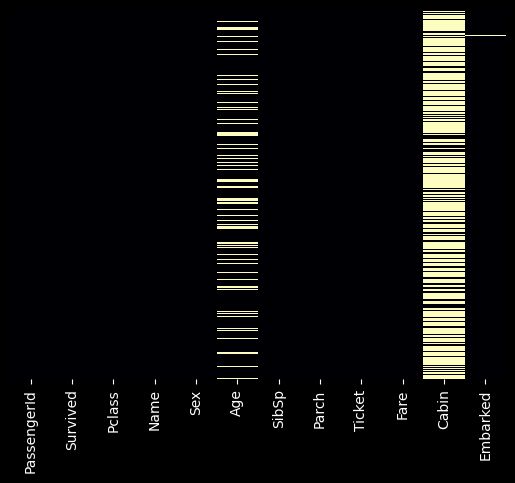

In [4]:
sns.heatmap(
    titanic.isnull(),
    yticklabels=False,
    cbar=False,
    cmap="magma",
)

In [8]:
fig = px.box(
    title="Relation of Age with Passenger Class",
    data_frame=titanic,
    x="Pclass",
    y="Age",
    color="Pclass",
)

fig.update_layout(
    xaxis_title="Passenger Classes",
    legend_title_text="Passenger Class",
)

fig.show()

#### Filling the Age Column with the Mean of Passenger based upon their passenger class


In [10]:
def impute_age(cols: list) -> int:
    """This function would return the age based upon the passenger boarding class i.e Pclass"""

    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24

    else:
        return Age

In [11]:
titanic["Age"] = titanic[["Age", "Pclass"]].apply(impute_age, axis=1)

C:\Users\MULTITECH\AppData\Local\Temp\ipykernel_4104\3707992956.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\MULTITECH\AppData\Local\Temp\ipykernel_4104\3707992956.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [34]:
titanic.dropna(inplace=True)

<Axes: >

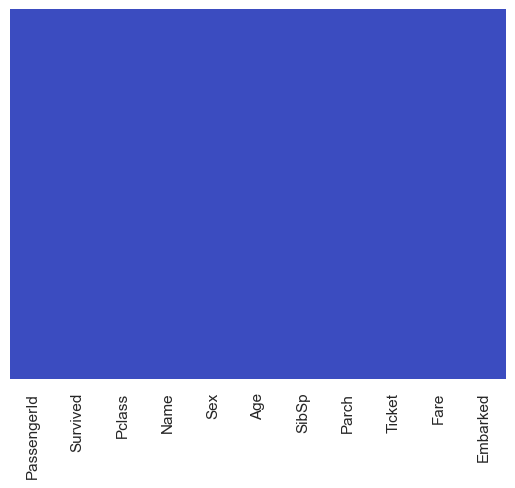

In [35]:
sns.heatmap(
    titanic.isnull(),
    yticklabels=False,
    cbar=False,
    cmap="coolwarm",
)

#### Droping the Cabin column because there are way to many NaN values


In [16]:
titanic.drop("Cabin", inplace=True, axis=1)

### Relation between the Survived and Age

#### Conclusion;

- Majority of the People are in the 25 - 35 age category


In [73]:
fig = px.histogram(
    x="Age",
    data_frame=titanic,
    nbins=30,
)

fig.update_layout(bargap=0.01)

fig.show()

### Relation b/w Survived and the Gender

#### Conclusion

- It seems like there majority of the people who survied are Female


In [60]:
titanic.head()

fig = px.histogram(
    data_frame=titanic,
    x="Survived",
    y="Sex",
    color="Sex",
    color_discrete_sequence=["dodgerblue", "crimson"],
)

fig.show()

### Relation of PassengerClass is Pclass and Survived

#### Conclusion:

- It seems like the majority of the people who didnot survive were from the Pclass == 3 meaning that they were from the the third passenger Class


In [68]:
fig = px.histogram(
    titanic,
    x="Survived",
    color="Pclass",
    barmode="group",
    title="Count of Survived by Passenger Class",
)

# Show the plot
fig.show()

### Relationship between the Spouse and Sibling Count

#### Conclusion:

- The majority of the people who didn't survive where singles


In [78]:
fig = px.histogram(
    data_frame=titanic,
    x="Survived",
    color="SibSp",
    barmode="group",
)

fig.show()

### Relation between the Fare Price and the Surivor Count

- It seems like the people who have paid higher fare price got much higher chances for there survival then others


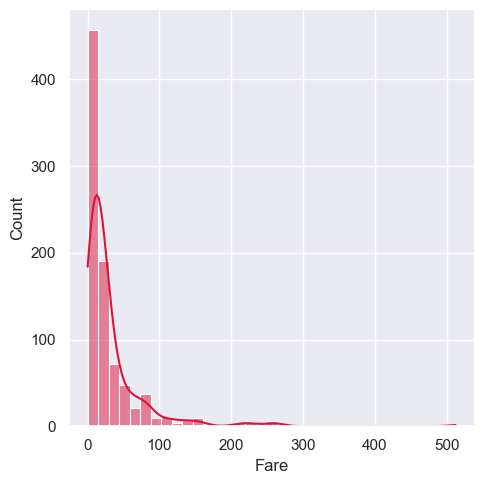

In [84]:
sns.displot(
    data=titanic,
    x="Fare",
    bins=35,
    color="crimson",
    kde=True,
)

### Converting the Sex and Emarked Column to Numeric Data


In [97]:
Sex = pd.get_dummies(
    titanic["Sex"],
    drop_first=True,
)

Embarked = pd.get_dummies(
    titanic["Embarked"],
    drop_first=True,
)

In [100]:
titanic = pd.concat(
    [titanic, Sex, Embarked],
    axis=1,
)

### Dropping the not needed columns


In [116]:
titanic.drop(["Embarked"], axis=1, inplace=True)

In [117]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


### Training the Logistic Model


In [118]:
X = titanic.drop("Survived", axis=1)
y = titanic["Survived"]

In [119]:
X_Train, x_test, Y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=101,
)

In [120]:
print(X_Train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)

(622, 8)
(267, 8)
(622,)
(267,)


In [121]:
log_model = LogisticRegression()

In [122]:
log_model.fit(X_Train, Y_train)

c:\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [123]:
predictions = log_model.predict(x_test)

In [127]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267

